<h1 style="color:red;"><strong>1. Look at the big Picture</h1>

<h2 style="color:yellow;">1.1 Frame the Problems</h2>

* **What's the business objective**

Building a model to predict car prices at Toyota addresses the key business challenge of optimizing pricing strategy to remain competitive in the market. This ensures that Toyota can set accurate and attractive prices for its vehicles, maximizing profitability while attracting and retaining customers in a highly competitive automotive industry.

* **How does the company expect to use and benefit from the model?**

The company expects to use the model to set competitive prices for its vehicles, maximize profitability, and attract more customers. The engineering team will collect data and predict the price using the model

* Frame problems --> chose algorithm --> performance measure --> ways/time to tune the model

<h2 style="color:yellow;">1.2 Chose performance measure (Loss)</h2>


### **1.2.1 Regression**
* RMSE
* MAE
* MSE, 
* RMSLE
* MAPE
* SMAPE

### **1.2.2 Classification**
* Binary Cross Entropy 
* Sparse Categorical Cross Entropy
* Categorial Cross Entropy

<h2 style="color:yellow;">1.3 Chose performance measure (Metrics)</h2>

### **1.3.1 Regression**
* Adjusted r^2

### **1.3.2 Classification**
* AUC
* Accuracy
* False Positive
* False Negative
* F1 Score
* Confusion matrix

<h2 style="color:yellow;">1.4 Check the Assumptions</h2>

<h1 style="color:red;"><strong>2. Get the Data</h1>

In [190]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
#-----------------------------
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
df = pd.read_csv(r"dataset\toyota_corolla.csv")

In [192]:
# Take a look at the top 5 rows
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500.0,23.0,10,2002,46986.0,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0
1,2,Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750.0,23.0,10,2002,72937.0,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0
2,3,Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950.0,24.0,9,2002,41711.0,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,4,Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950.0,26.0,7,2002,48000.0,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,5,Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750.0,30.0,3,2002,38500.0,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1436 non-null   int64  
 1   Model              1436 non-null   object 
 2   Price              1431 non-null   float64
 3   Age_08_04          1431 non-null   float64
 4   Mfg_Month          1436 non-null   int64  
 5   Mfg_Year           1436 non-null   int64  
 6   KM                 1433 non-null   float64
 7   Fuel_Type          1436 non-null   object 
 8   HP                 1436 non-null   int64  
 9   Met_Color          1436 non-null   int64  
 10  Color              1436 non-null   object 
 11  Automatic          1436 non-null   int64  
 12  CC                 1436 non-null   int64  
 13  Doors              1436 non-null   int64  
 14  Cylinders          1436 non-null   int64  
 15  Gears              1436 non-null   int64  
 16  Quarterly_Tax      1436 

The dataset doesn't have any null value, so we we will simulate null value by dropping some of the values in df

In [194]:
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,1436.000000,1431.000000,1431.000000,1436.000000,1436.000000,1433.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10710.282320,56.051712,5.548747,1999.625348,68589.512910,101.502089,0.674791,0.055710,1576.85585,4.033426,4.0,5.026462,87.122563,1072.45961,0.409471,0.895543,3.815460,0.81337,0.970752,0.722841,0.508357,0.056407,0.294568,0.218663,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.002786,0.277855
std,416.476890,3615.554691,18.546788,3.354085,1.540722,37524.703581,14.981080,0.468616,0.229441,424.38677,0.952677,0.0,0.188510,41.128611,52.64112,0.491907,0.305959,3.011025,0.38975,0.168559,0.447751,0.500104,0.230786,0.456007,0.413483,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.052723,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,2.000000,4.0,3.000000,19.000000,1000.00000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,3.000000,4.0,5.000000,69.000000,1040.00000,0.000000,1.000000,3.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63459.000000,110.000000,1.000000,0.000000,1600.00000,4.000000,4.0,5.000000,85.000000,1070.00000,0.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1081.250000,11940.000000,70.000000,8.000000,2001.000000,87083.000000,110.000000,1.000000,0.000000,1600.00000,5.000000,4.0,5.000000,85.000000,1085.00000,1.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,5.000000,4.0,6.000000,283.000000,1615.00000,1.000000,1.000000,36.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h1 style="color:red;"><strong>3. Data Cleaning (General)</h1>

<h2 style="color:yellow;">3.1 Formating</h2>

In [195]:
df.head(1)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500.0,23.0,10,2002,46986.0,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0


In [196]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

### 3.1.1 Format column names

In [197]:
def rename_columns(df):
   # convert form camel case to snake case
   df.columns = (df.columns
                  .str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True)
                  .str.lower()
               )
   # convert " " to _
   df.columns = df.columns.str.replace(' ', '_')
   return df

In [198]:
df = rename_columns(df)

In [199]:
df.columns

Index(['id', 'model', 'price', 'age_08_04', 'mfg_month', 'mfg_year', 'km',
       'fuel_type', 'hp', 'met_color', 'color', 'automatic', 'cc', 'doors',
       'cylinders', 'gears', 'quarterly_tax', 'weight', 'mfr_guarantee',
       'bovag_guarantee', 'guarantee_period', 'abs', 'airbag_1', 'airbag_2',
       'airco', 'automatic_airco', 'boardcomputer', 'cd_player',
       'central_lock', 'powered_windows', 'power_steering', 'radio',
       'mistlamps', 'sport_model', 'backseat_divider', 'metallic_rim',
       'radio_cassette', 'parking_assistant', 'tow_bar'],
      dtype='object')

In [200]:
# rename function:
# df.rename(columns={'unnamed:_0': 'id'}, inplace=True)

In [201]:
df.columns

Index(['id', 'model', 'price', 'age_08_04', 'mfg_month', 'mfg_year', 'km',
       'fuel_type', 'hp', 'met_color', 'color', 'automatic', 'cc', 'doors',
       'cylinders', 'gears', 'quarterly_tax', 'weight', 'mfr_guarantee',
       'bovag_guarantee', 'guarantee_period', 'abs', 'airbag_1', 'airbag_2',
       'airco', 'automatic_airco', 'boardcomputer', 'cd_player',
       'central_lock', 'powered_windows', 'power_steering', 'radio',
       'mistlamps', 'sport_model', 'backseat_divider', 'metallic_rim',
       'radio_cassette', 'parking_assistant', 'tow_bar'],
      dtype='object')

### 3.1.2 Format data body

In [202]:
df['model'].unique()

array(['Corolla 2.0 D4D HATCHB TERRA 2/3-Doors',
       'Corolla 2.0 D4D HATCHB SOL 2/3-Doors',
       'Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors',
       'Corolla 1800 T SPORT VVT I 2/3-Doors',
       'Corolla 1.9 D HATCHB TERRA 2/3-Doors',
       'Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors',
       'Corolla 1.8 16V VVTLI 3DR T SPORT BNS 2/3-Doors',
       'Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-Doors',
       'Corolla 1.6 VVTI Linea Terra Comfort 2/3-Doors',
       'Corolla 1.6 16v L.SOL 2/3-Doors',
       'Corolla 1.6 16V VVT I 3DR TERRA 2/3-Doors',
       'Corolla 1.6 16V VVT I 3DR SOL AUT4 2/3-Doors',
       'Corolla 1.6 16V VVT I 3DR SOL 2/3-Doors',
       'Corolla 1.4 VVTI Linea Terra 2/3-Doors',
       'Corolla 1.4 16V VVT I 3DR TERRA COMFORT 2/3-Doors',
       'Corolla 1.4 16V VVT I 3DR TERRA 2/3-Doors',
       'Corolla 1.4 16V VVT I 3DR 2/3-Doors',
       'Corolla 2.0 D4D 90 5DR TERRA COMFORT 4/5-Doors',
       'Corolla 2.0 D4D 90 5DR SOL 4/5-Doors',
       'Corolla 2.0 D4D 90 5D

Split the columns model to make, version, engine, body type, trim, and doors

In [203]:
def extract_version(df, column_name):
    # Split the 'model' column by spaces
    split_model = df[column_name].str.split(' ', expand=True)
    
    # Extract the part between the first and second space as the 'version'
    version = split_model[1].where(split_model[1].str.match(r'^\d+(\.\d+)?$'))
    
    # Assign the 'version' to the DataFrame
    df['version'] = version
    
    return df

In [204]:
df = extract_version(df, 'model')

In [205]:
df.version.unique()

array(['2.0', '1800', '1.9', '1.8', '1.6', '1.4', nan, '1', '1.3'],
      dtype=object)

In [206]:
def extract_doors(df, column_name):
    # Extract the 'doors' component using regular expression
    df['doors'] = df[column_name].str.extract(r'(\d/\d-Doors)')

    return df

In [207]:
df = extract_doors(df, 'model')

In [208]:
df.doors.unique()

array(['2/3-Doors', '4/5-Doors', nan], dtype=object)

In [209]:
df.columns

Index(['id', 'model', 'price', 'age_08_04', 'mfg_month', 'mfg_year', 'km',
       'fuel_type', 'hp', 'met_color', 'color', 'automatic', 'cc', 'doors',
       'cylinders', 'gears', 'quarterly_tax', 'weight', 'mfr_guarantee',
       'bovag_guarantee', 'guarantee_period', 'abs', 'airbag_1', 'airbag_2',
       'airco', 'automatic_airco', 'boardcomputer', 'cd_player',
       'central_lock', 'powered_windows', 'power_steering', 'radio',
       'mistlamps', 'sport_model', 'backseat_divider', 'metallic_rim',
       'radio_cassette', 'parking_assistant', 'tow_bar', 'version'],
      dtype='object')

Many more way to clean this df and extract this model (['make', 'version', 'engine', 'body_type', 'trim', 'doors']), but for the sake of time let move to other formating

### 3.1.3 Format Datatypes
After we format all the data body and columns, let's format the data types

In [210]:
df.dtypes

id                     int64
model                 object
price                float64
age_08_04            float64
mfg_month              int64
mfg_year               int64
km                   float64
fuel_type             object
hp                     int64
met_color              int64
color                 object
automatic              int64
cc                     int64
doors                 object
cylinders              int64
gears                  int64
quarterly_tax          int64
weight                 int64
mfr_guarantee          int64
bovag_guarantee        int64
guarantee_period       int64
abs                    int64
airbag_1               int64
airbag_2               int64
airco                  int64
automatic_airco        int64
boardcomputer          int64
cd_player              int64
central_lock           int64
powered_windows        int64
power_steering         int64
radio                  int64
mistlamps              int64
sport_model            int64
backseat_divid

Datatypes are formatted correctly, so no need to further format datatypes, but in other scenario, it might be best format datatypes when there's date/datetime columns

<h1 style="color:red;"><strong>4. Attribute Combination</h1>

In [211]:
df.columns

Index(['id', 'model', 'price', 'age_08_04', 'mfg_month', 'mfg_year', 'km',
       'fuel_type', 'hp', 'met_color', 'color', 'automatic', 'cc', 'doors',
       'cylinders', 'gears', 'quarterly_tax', 'weight', 'mfr_guarantee',
       'bovag_guarantee', 'guarantee_period', 'abs', 'airbag_1', 'airbag_2',
       'airco', 'automatic_airco', 'boardcomputer', 'cd_player',
       'central_lock', 'powered_windows', 'power_steering', 'radio',
       'mistlamps', 'sport_model', 'backseat_divider', 'metallic_rim',
       'radio_cassette', 'parking_assistant', 'tow_bar', 'version'],
      dtype='object')

In [212]:
df.head()

,id,model,price,age_08_04,mfg_month,mfg_year,km,fuel_type,hp,met_color,color,automatic,cc,doors,cylinders,gears,quarterly_tax,weight,mfr_guarantee,bovag_guarantee,guarantee_period,abs,airbag_1,airbag_2,airco,automatic_airco,boardcomputer,cd_player,central_lock,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,parking_assistant,tow_bar,version
0,1,Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500.0,23.0,10,2002,46986.0,Diesel,90,1,Blue,0,2000,2/3-Doors,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,2.0
1,2,Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750.0,23.0,10,2002,72937.0,Diesel,90,1,Silver,0,2000,2/3-Doors,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,2.0
2,3,Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950.0,24.0,9,2002,41711.0,Diesel,90,1,Blue,0,2000,2/3-Doors,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,2.0
3,4,Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950.0,26.0,7,2002,48000.0,Diesel,90,0,Black,0,2000,2/3-Doors,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,2.0
4,5,Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750.0,30.0,3,2002,38500.0,Diesel,90,0,Black,0,2000,2/3-Doors,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0,2.0


In [213]:
df['km_per_year'] = df['km']/df['age_08_04']

<h1 style="color:red;"><strong> 5. EDA</h1>

In [214]:
df.apply(lambda col: col.unique())

id                   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
model                [Corolla 2.0 D4D HATCHB TERRA 2/3-Doors, Corol...
price                [13500.0, 13750.0, 13950.0, 14950.0, 12950.0, ...
age_08_04            [23.0, 24.0, 26.0, 30.0, 32.0, 27.0, 25.0, 22....
mfg_month                      [10, 9, 7, 3, 1, 6, 8, 11, 2, 5, 4, 12]
mfg_year                    [2002, 2003, 2004, 2001, 2000, 1999, 1998]
km                   [46986.0, 72937.0, 41711.0, 48000.0, 38500.0, ...
fuel_type                                        [Diesel, Petrol, CNG]
hp                   [90, 192, 69, 110, 97, 71, 116, 98, 86, 72, 10...
met_color                                                       [1, 0]
color                [Blue, Silver, Black, White, Grey, Red, Green,...
automatic                                                       [0, 1]
cc                   [2000, 1800, 1900, 1600, 1400, 1598, 16000, 19...
doors                                      [2/3-Doors, 4/5-Doors, nan]
cylind

In [215]:
cat_attribs = ['model', 'fuel_type', 'color', 'doors', 'version']
bin_attribs = [col for col in df.columns if len(df[col].unique()) == 2 or len(df[col].unique()) == 1]
num_attribs = [col for col in df.columns if col not in cat_attribs and col not in bin_attribs and col != 'id']

## 5.1 Univariate

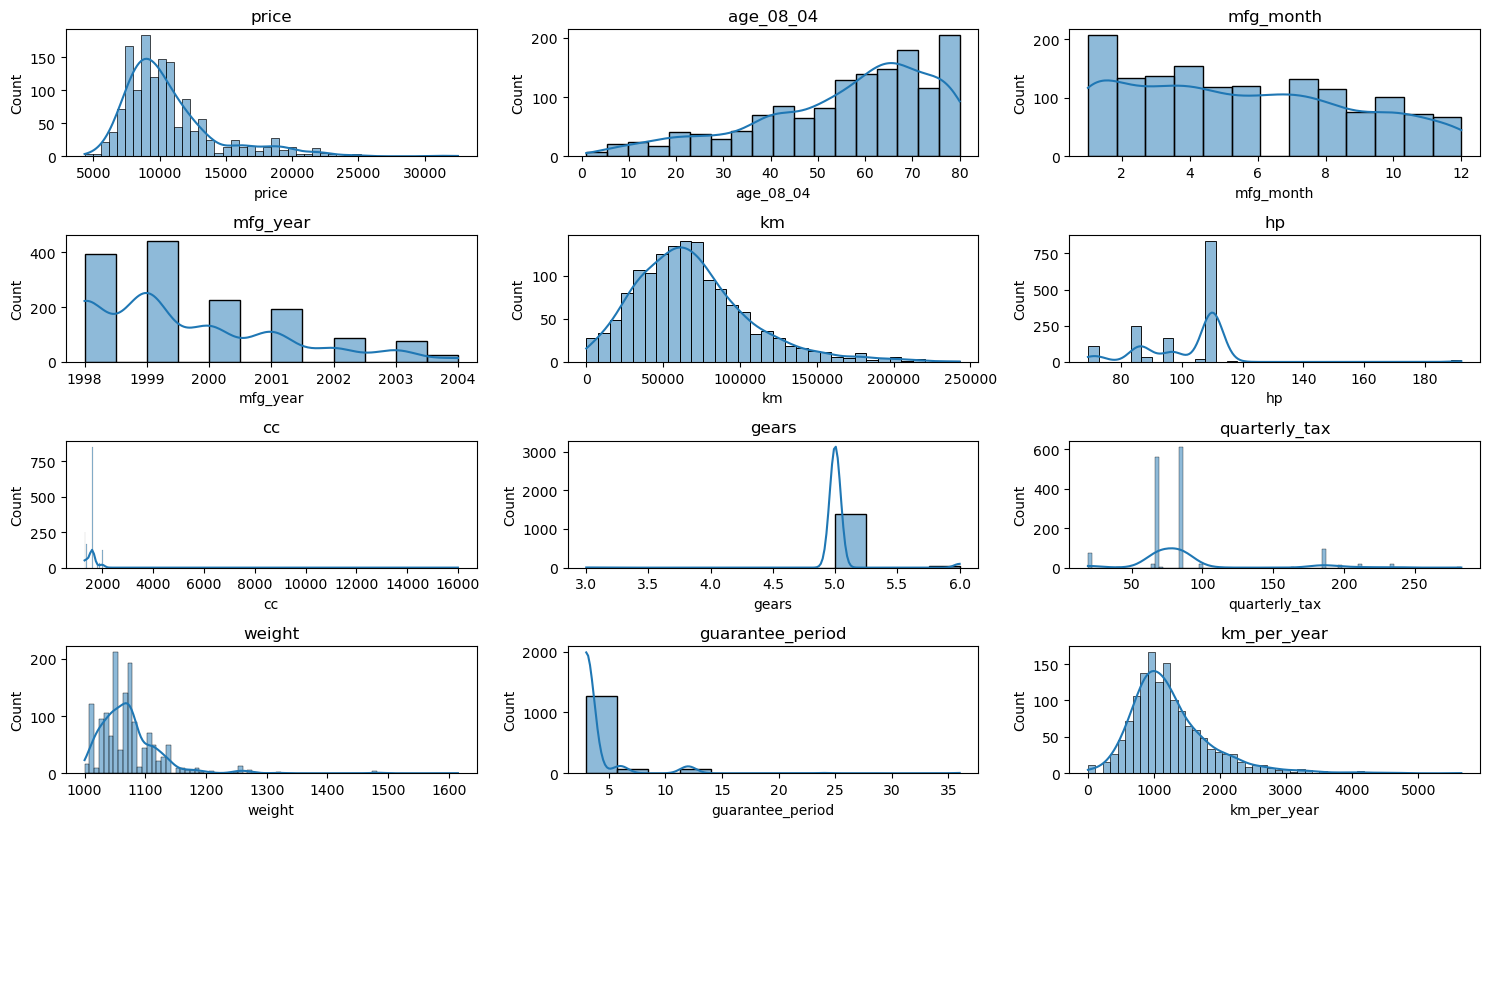

In [216]:
# Define the number of rows and columns for subplots
num_rows = 5
num_cols = (len(num_attribs) + num_rows - 1) // num_rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array to iterate over numerical attributes
axes = axes.flatten()

# Iterate over numerical attributes and plot histograms
for i, column in enumerate(num_attribs):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(column)

# Hide empty subplots
for j in range(i+1, num_rows*num_cols):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

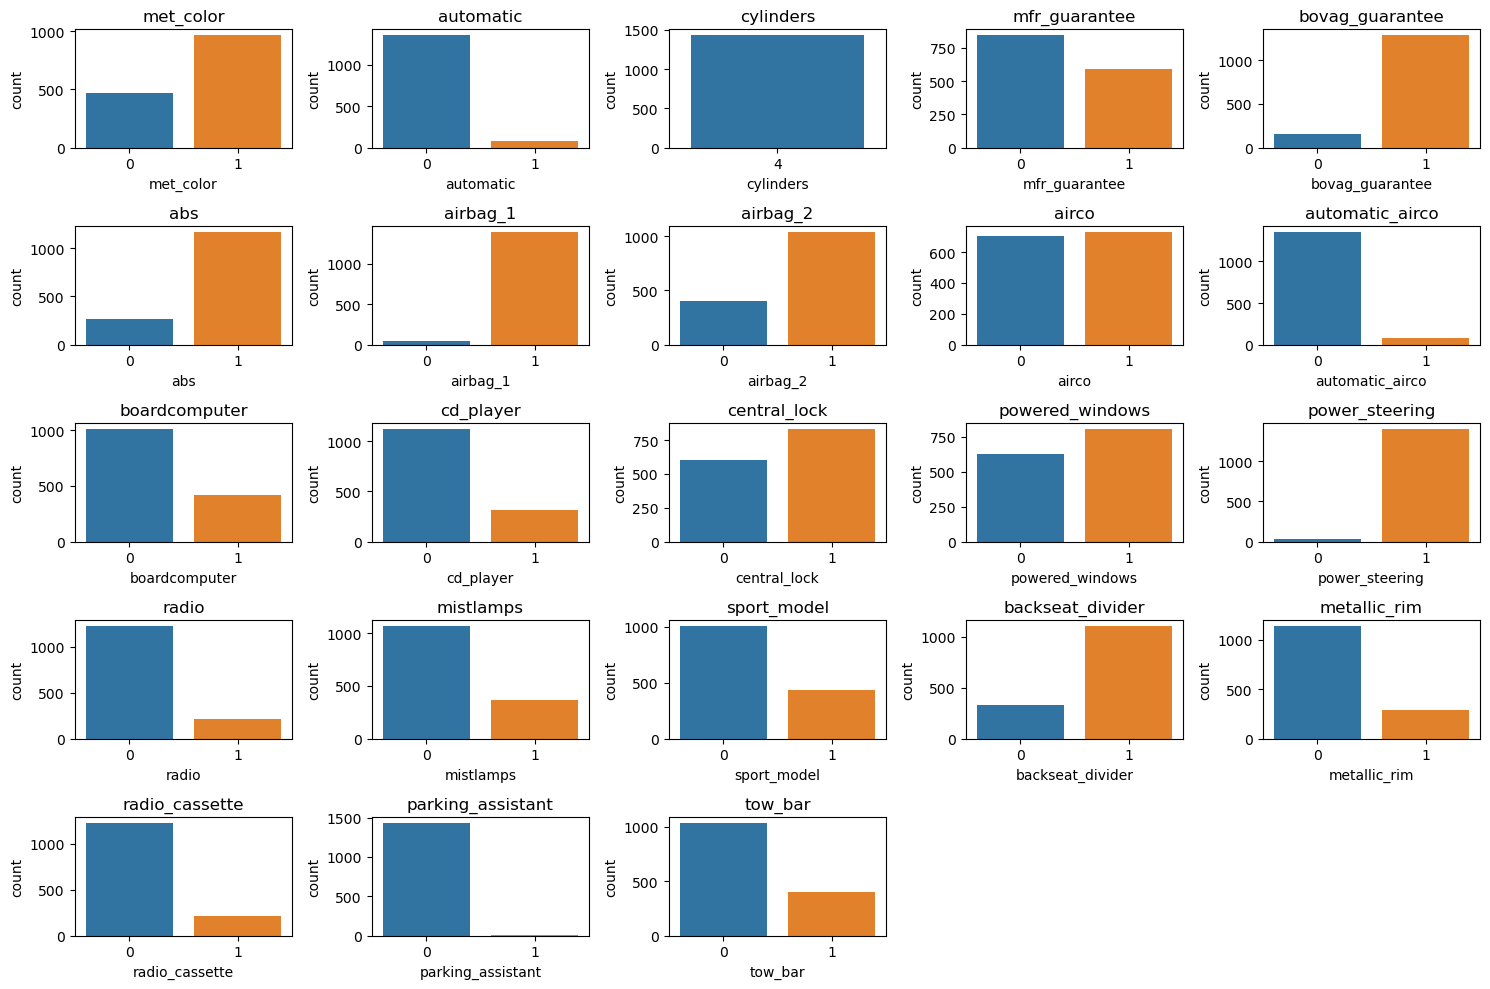

In [217]:
# Define the number of rows and columns for subplots
num_rows = 5
num_cols = (len(bin_attribs) + num_rows - 1) // num_rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array to iterate over binary attributes
axes = axes.flatten()

# Iterate over binary attributes and plot bar graphs
for i, column in enumerate(bin_attribs):
    sns.countplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)

# Hide empty subplots
for j in range(i+1, num_rows*num_cols):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

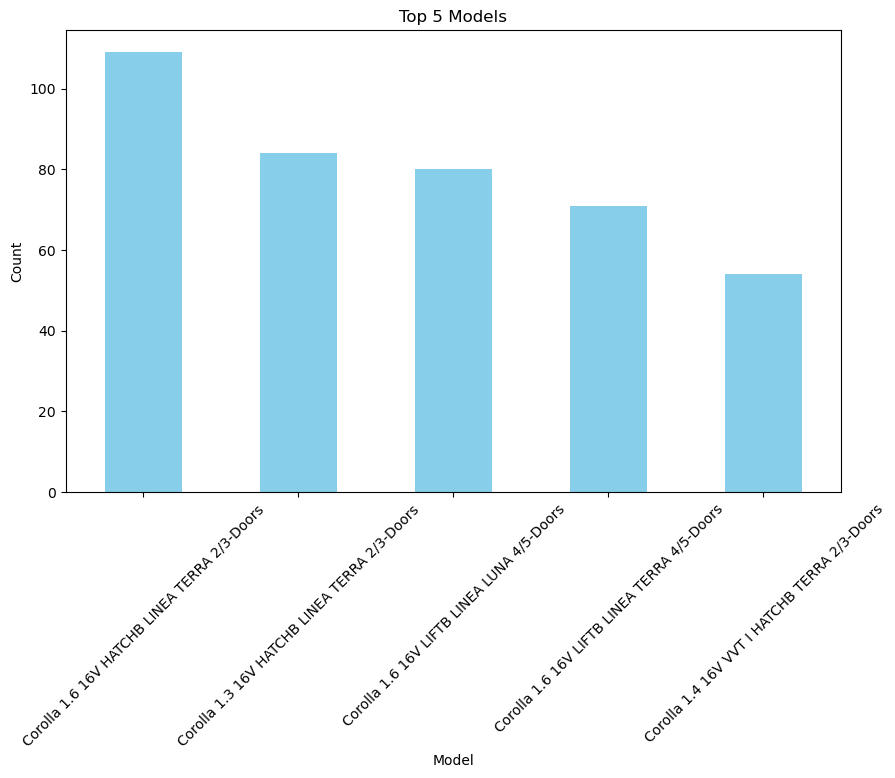

In [218]:
# Count the occurrences of each model
model_counts = df['model'].value_counts().head(5)

# Plotting
plt.figure(figsize=(10, 6))
model_counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 Models')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

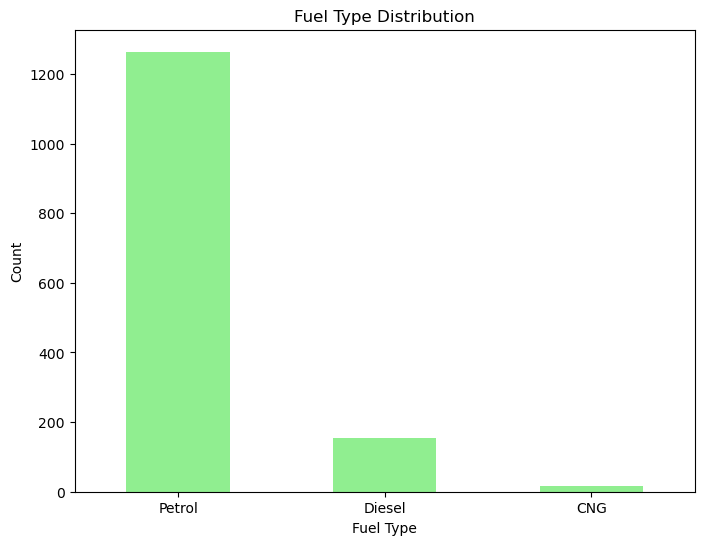

In [219]:

# Count the occurrences of each fuel type
fuel_counts = df['fuel_type'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
fuel_counts.plot(kind='bar', color='lightgreen')
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

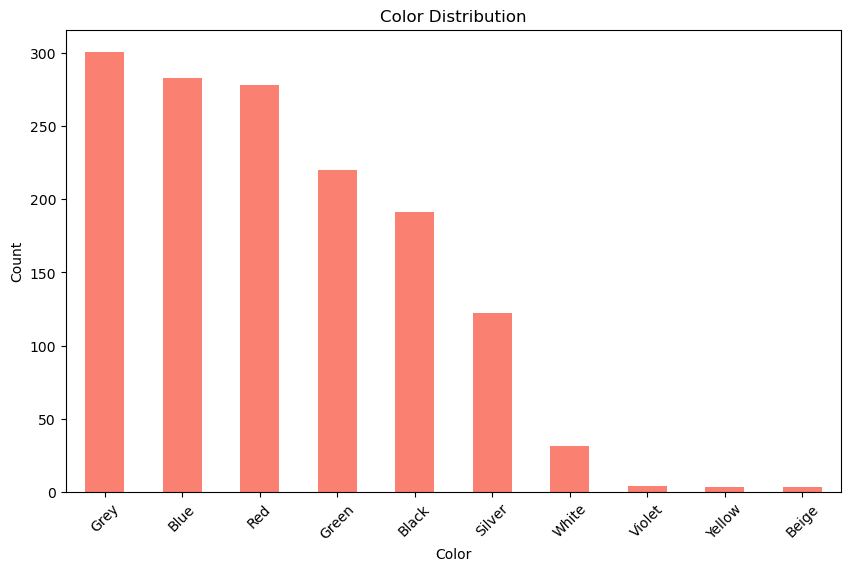

In [220]:
# Count the occurrences of each color
color_counts = df['color'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
color_counts.plot(kind='bar', color='salmon')
plt.title('Color Distribution')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

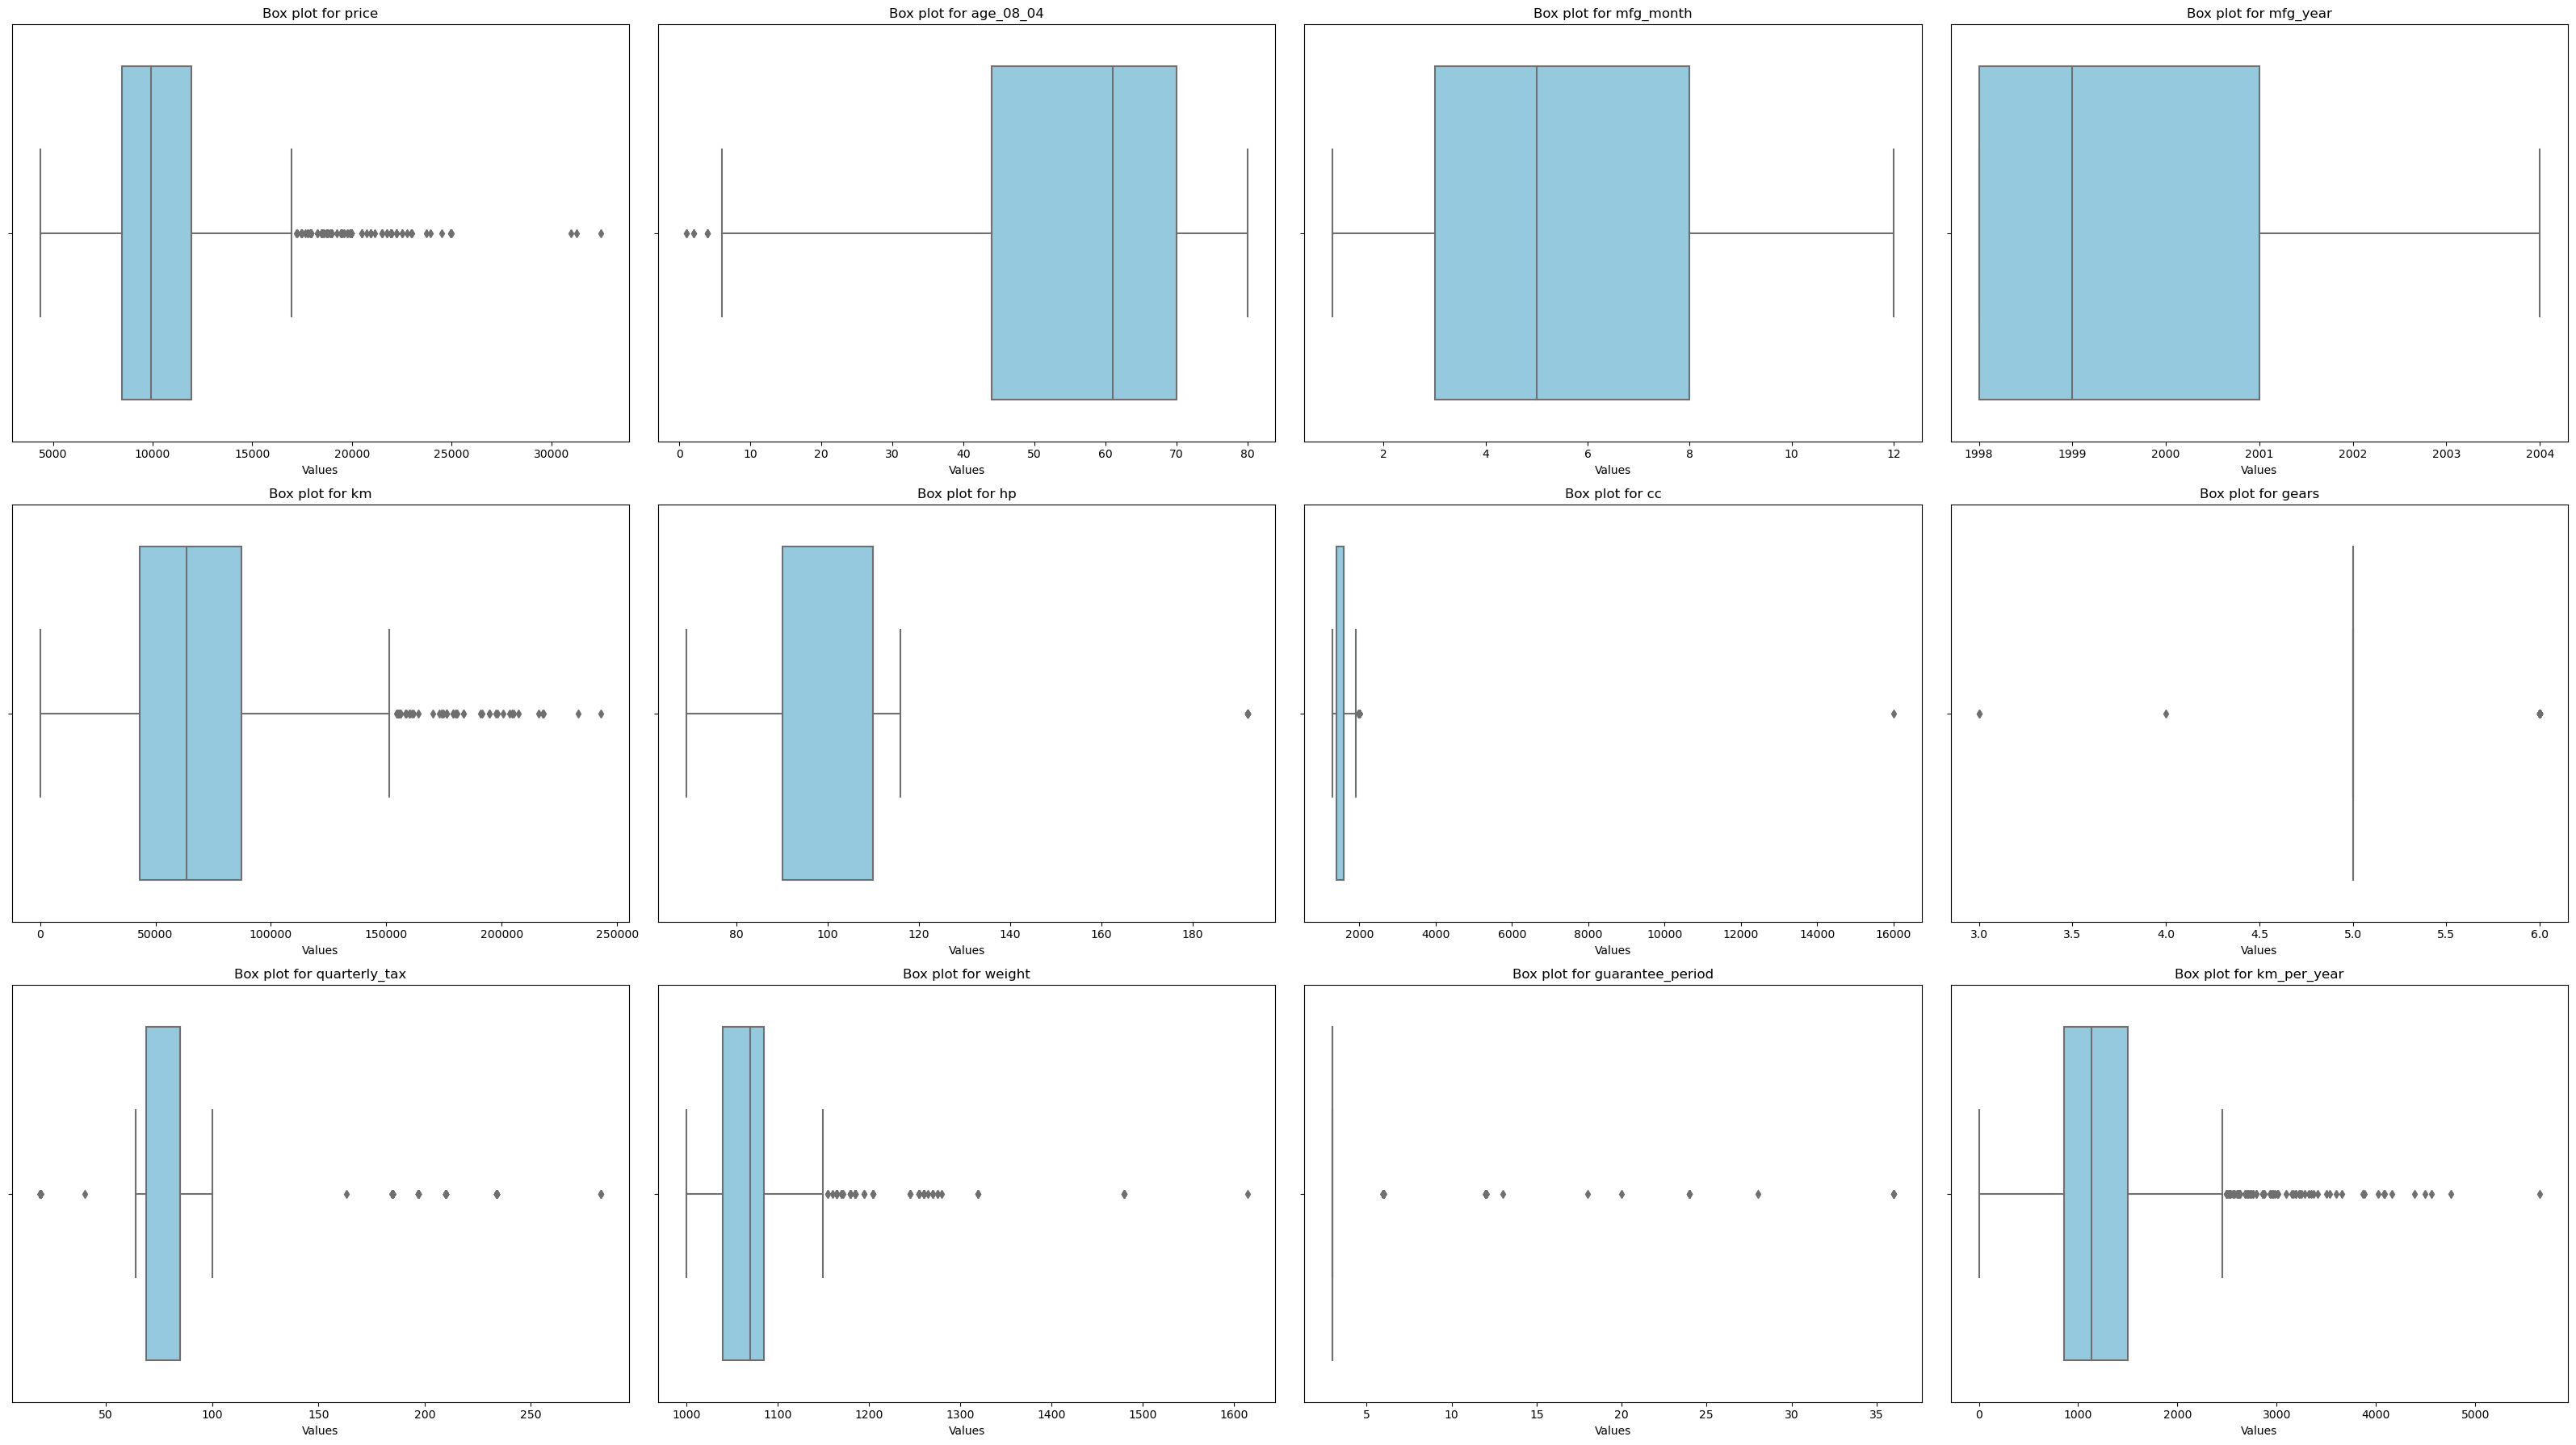

In [221]:
num_rows = 3
num_cols = len(num_attribs) // num_rows + (len(num_attribs) % num_rows > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))
axes = axes.ravel()  # Flatten the axes array

for i, col in enumerate(num_attribs):
    ax = axes[i]
    sns.boxplot(x=df[col], ax=ax, color='skyblue')  # Use seaborn's boxplot function
    ax.set_title(f'Box plot for {col}')
    ax.set_xlabel('Values')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

## 5.2 Bivariate

c:\Users\hamin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


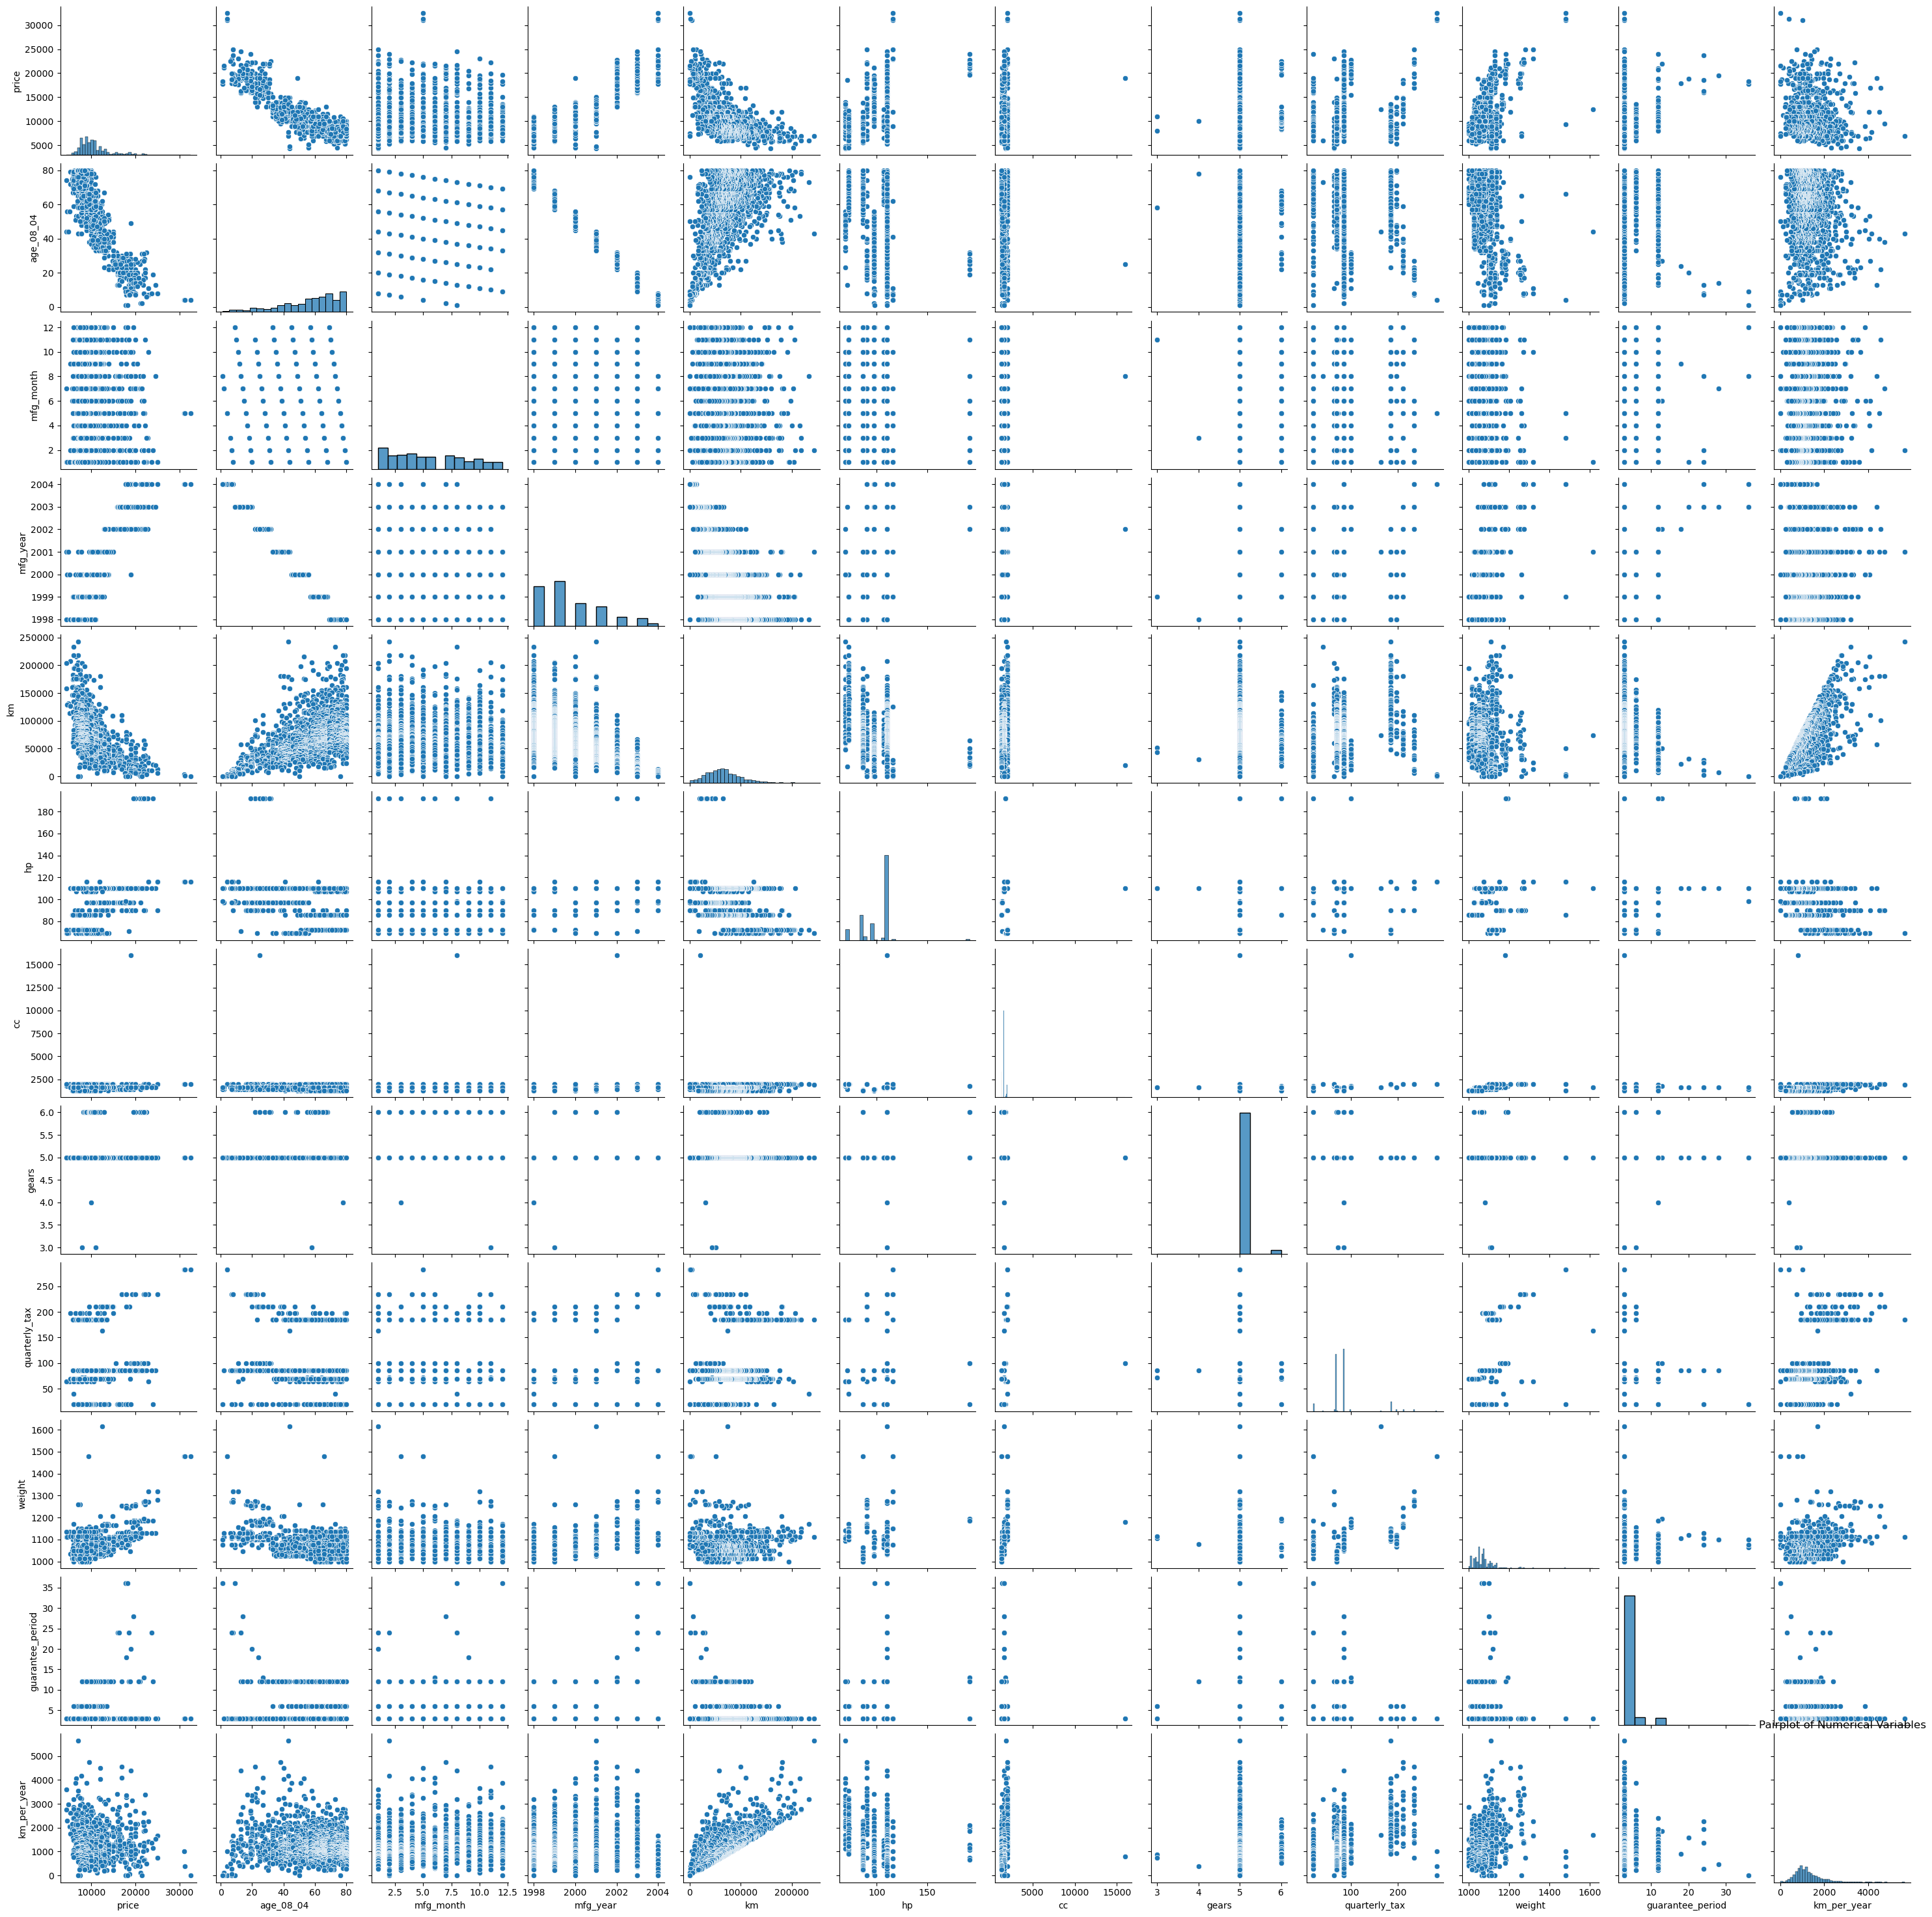

In [222]:
sns.pairplot(df[num_attribs])
plt.title('Pairplot of Numerical Variables')
plt.show()

In [223]:
def plot_distribution_curves(df, columns, hue_column):
    """
    Plot distribution curves for each column in the DataFrame
    with respect to the specified hue column using different colors.

    Parameters:
        df (pandas.DataFrame): DataFrame containing the data.
        columns (list): List of columns to plot.
        hue_column (str): Column to use for coloring the distribution curves.

    Returns:
        None
    """
    colors = sns.color_palette("husl", len(df[hue_column].unique()))
    
    num_plots = len(columns)
    fig, axes = plt.subplots(nrows=2, ncols=num_plots // 2, figsize=(15, 10))
    axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

    for i, col in enumerate(columns):
        for j, value in enumerate(df[hue_column].unique()):
            sns.kdeplot(data=df[df[hue_column] == value], x=col, color=colors[j], ax=axes[i])
        axes[i].set_title(f"Distribution of {col} by {hue_column}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Density')
        axes[i].legend(df[hue_column].unique(), title=hue_column)

    plt.tight_layout()
    plt.show()

C:\Users\hamin\AppData\Local\Temp\ipykernel_13064\2769552773.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[df[hue_column] == value], x=col, color=colors[j], ax=axes[i])
C:\Users\hamin\AppData\Local\Temp\ipykernel_13064\2769552773.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[df[hue_column] == value], x=col, color=colors[j], ax=axes[i])


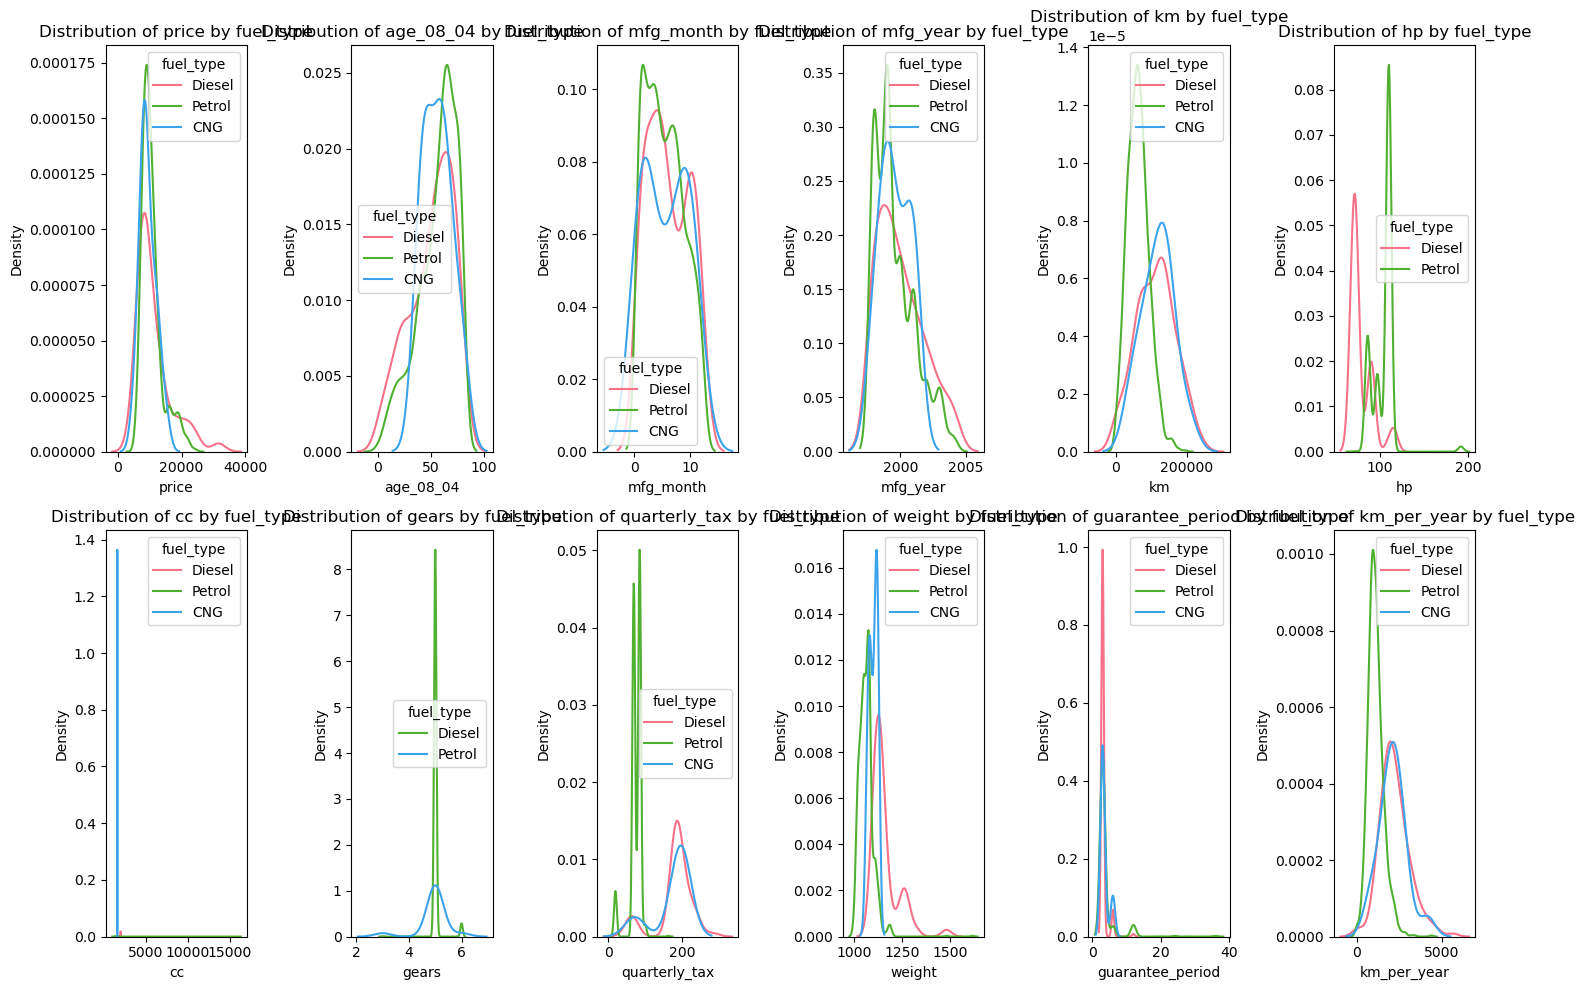

In [224]:
plot_distribution_curves(df, num_attribs, 'fuel_type')

## 5.3 Multivariate

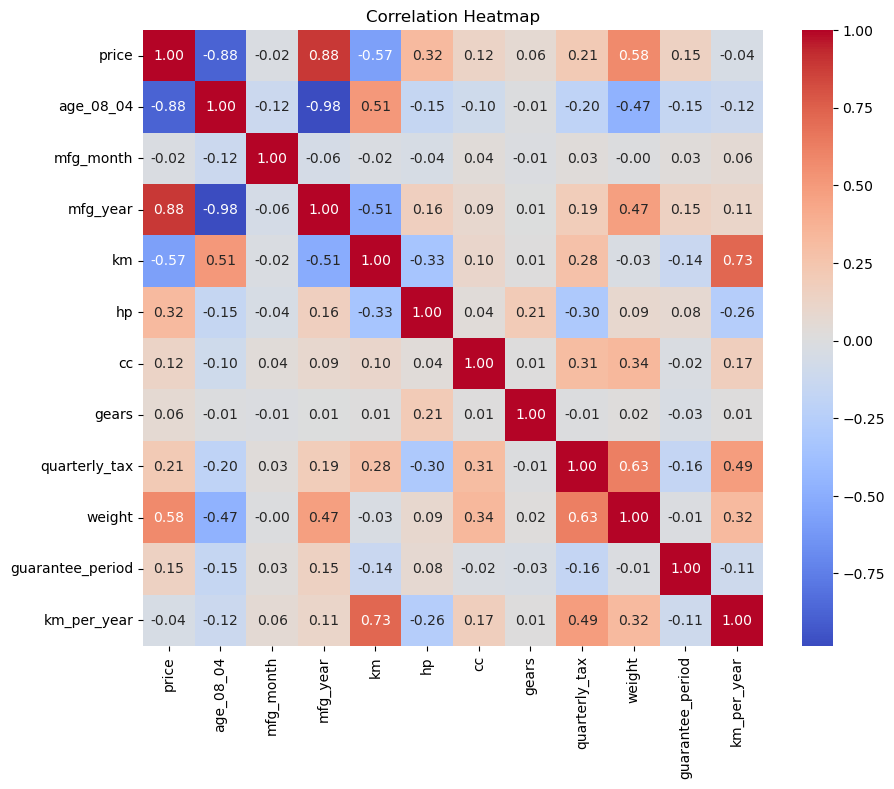

In [225]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_attribs].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 6. Handle Labels (Optionals)
* Drop null labels
* Drop outlier labels

# 7. Split Train Test For Modelling

In [226]:
num_attribs.remove("price")

In [227]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

train = train_set.drop("price", axis=1)
train_labels = train_set[["price"]]

train_num = train[num_attribs+bin_attribs]
train_cat = train[cat_attribs]


test = test_set.drop("price", axis=1)
test_labels = test_set[["price"]]

# 8. Data Cleaning for Modelling

In [228]:
train_set.isnull().sum()

id                    0
model                 0
price                 3
age_08_04             4
mfg_month             0
mfg_year              0
km                    3
fuel_type             0
hp                    0
met_color             0
color                 0
automatic             0
cc                    0
doors                62
cylinders             0
gears                 0
quarterly_tax         0
weight                0
mfr_guarantee         0
bovag_guarantee       0
guarantee_period      0
abs                   0
airbag_1              0
airbag_2              0
airco                 0
automatic_airco       0
boardcomputer         0
cd_player             0
central_lock          0
powered_windows       0
power_steering        0
radio                 0
mistlamps             0
sport_model           0
backseat_divider      0
metallic_rim          0
radio_cassette        0
parking_assistant     0
tow_bar               0
version              35
km_per_year           7
dtype: int64

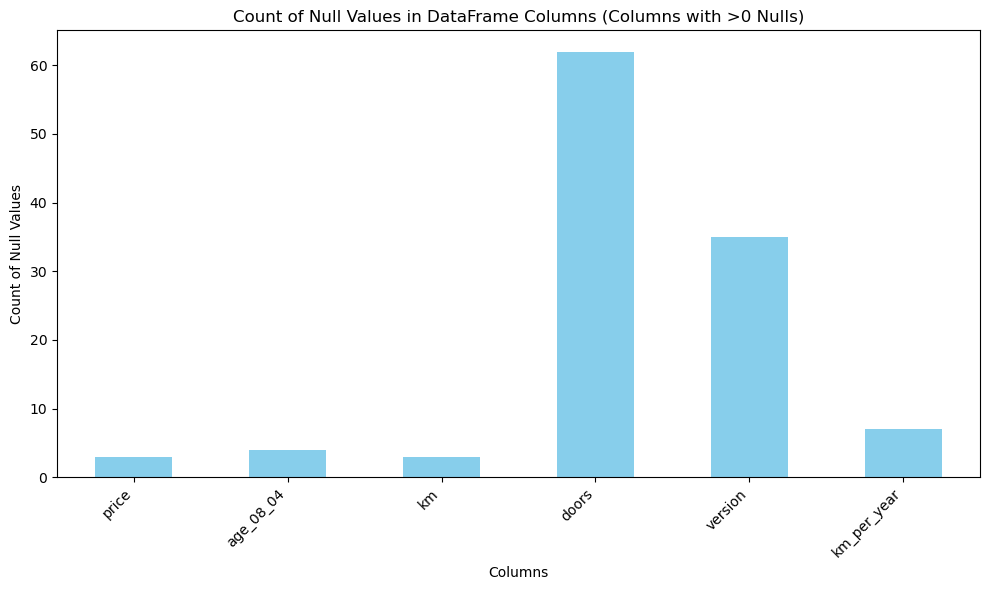

In [229]:
# Count null values in each column
null_counts = train_set.isnull().sum()

# Filter columns with more than zero null values
null_counts_gt_zero = null_counts[null_counts > 0]

# Plotting the null counts
plt.figure(figsize=(10, 6))
null_counts_gt_zero.plot(kind='bar', color='skyblue')
plt.title('Count of Null Values in DataFrame Columns (Columns with >0 Nulls)')
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## 8.1 Handle Nulls

### 8.1.1 Types of NULLS

**Missing Completely at Random (MCAR)**
- Missing data is random
- Data was lost in ETL, someone was interrupted when completing a survey
- Remove or impute

**Missing at Random (MAR)**
- Missing data suggests something about something else observed
- Older (which we have in data) may have higher privacy concerns and not report income
- Remove or impute

**Missing Not at Random (MNAR)**
- Missing based on something not observed
- Self-selection bias: Depressed do not complete mental health surveys
- Advanced econometrics

**By Design:**
- Remove credit card data if birthdate is below a certain value

### 8.1.2 Solutions to handle Nulls 
- Get rid of the corresponding rows.
- Get rid of the whole attribute.
- Set the values to some value (zero, the mean, the median, etc.).
- Create a new column that have True for the non-null and False for null (or the opposite)

In [230]:
# df.dropna(subset=["minimum_payments"]) # option 1
# df.drop("minimum_payments", axis=1) # option 2
# median = df["minimum_payments"].median() # option 3
# df["minimum_payments"].fillna(median, inplace=True) # option 4
# 

In [231]:
from sklearn.impute import SimpleImputer
train_imputer = SimpleImputer(strategy="median")
train_labels_imputer = SimpleImputer(strategy="median")

Fit train (non_labels)

In [232]:
train_imputer.fit(train_num)

SimpleImputer(strategy='median')

In [233]:
train_num.isnull().sum().sum()

14

In [234]:
train_imputer.statistics_


array([6.100000e+01, 5.000000e+00, 1.999000e+03, 6.473100e+04,
       1.100000e+02, 1.600000e+03, 5.000000e+00, 8.500000e+01,
       1.065000e+03, 3.000000e+00, 1.146825e+03, 1.000000e+00,
       0.000000e+00, 4.000000e+00, 0.000000e+00, 1.000000e+00,
       1.000000e+00, 1.000000e+00, 1.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
       1.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00])

In [235]:
train_num.median().values

array([6.100000e+01, 5.000000e+00, 1.999000e+03, 6.473100e+04,
       1.100000e+02, 1.600000e+03, 5.000000e+00, 8.500000e+01,
       1.065000e+03, 3.000000e+00, 1.146825e+03, 1.000000e+00,
       0.000000e+00, 4.000000e+00, 0.000000e+00, 1.000000e+00,
       1.000000e+00, 1.000000e+00, 1.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
       1.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00])

In [236]:
X = train_imputer.transform(train_num) # return Numpy value

In [237]:
train_num =  pd.DataFrame(X, columns=train_num.columns)


In [238]:
train_num.isnull().sum().sum()

0

Fit Labels

In [239]:
train_labels_imputer.fit(train_labels)

SimpleImputer(strategy='median')

In [240]:
train_labels_imputer.statistics_


array([9825.])

In [241]:
train_labels.isnull().sum()

price    3
dtype: int64

In [242]:
Y = train_labels_imputer.transform(train_labels) # return Numpy value

In [243]:
train_labels =  pd.DataFrame(Y, columns=train_labels.columns)


## 8.2 Handle Outliers

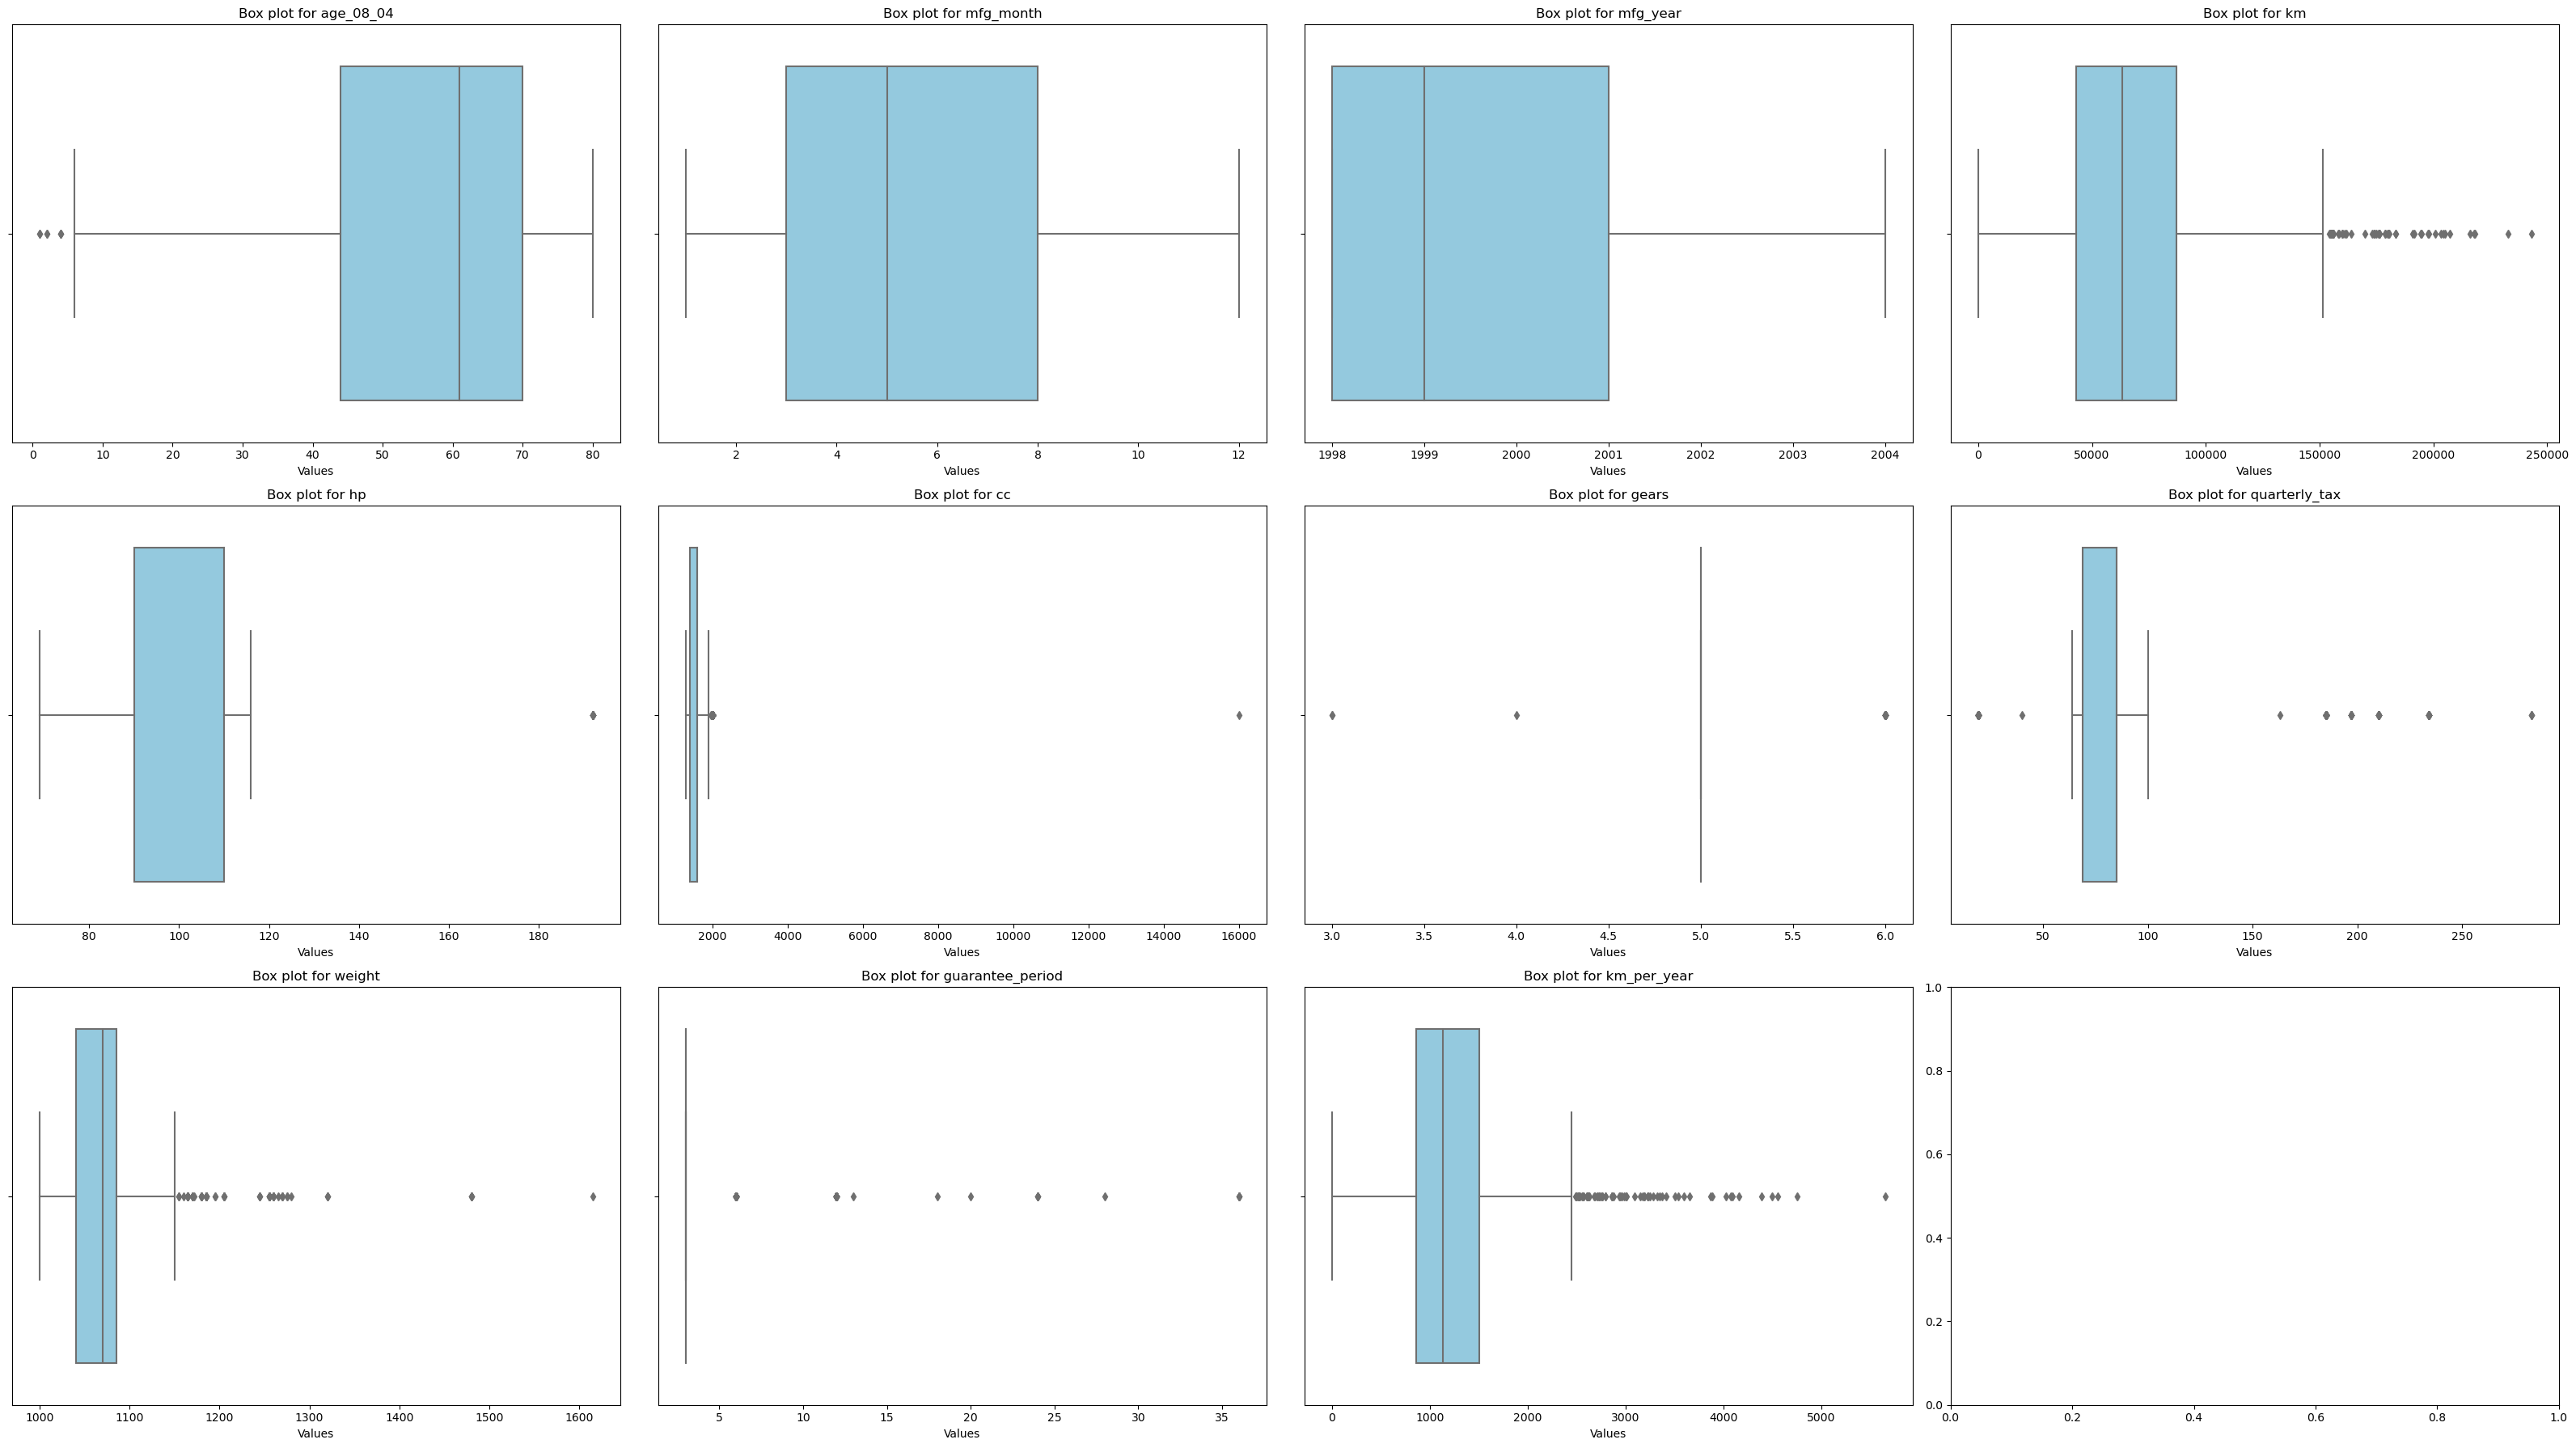

In [244]:
num_rows = 3
num_cols = len(num_attribs) // num_rows + (len(num_attribs) % num_rows > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))
axes = axes.ravel()  # Flatten the axes array

for i, col in enumerate(num_attribs):
    ax = axes[i]
    sns.boxplot(x=df[col], ax=ax, color='skyblue')  # Use seaborn's boxplot function
    ax.set_title(f'Box plot for {col}')
    ax.set_xlabel('Values')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [245]:
# Remove Outlier
def remove_outliers(df, column_names=None):
    """
    Remove outliers from specific columns in the DataFrame based on the interquartile range (IQR) method,
    or remove outliers from all numerical columns if column_names is None.

    Parameters:
    - df: DataFrame
        The DataFrame containing the data.
    - column_names: list or None, default None
        The list of column names for which outliers are to be removed,
        or None to remove outliers from all numerical columns.

    Returns:
    - df_filtered: DataFrame
        The DataFrame with outliers removed.
    """
    if column_names is None:
        num_attribs = df.select_dtypes(include='number').columns
    else:
        num_attribs = column_names

    total_removed = 0
    total_rows = len(df)

    for col in num_attribs:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers from the specified column
        removed_rows = len(df) - len(df[(df[col] >= lower_bound) & (df[col] <= upper_bound)])
        total_removed += removed_rows

        # Update DataFrame
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

        # Print the number and percentage of removed values if any rows have been removed
        percentage_removed = (removed_rows / total_rows) * 100
        print(f"Removed {removed_rows} rows ({percentage_removed:.2f}%) due to outliers in column '{col}'.")

    return df

In [246]:
# We are not handling any outlier in this case to see how the model perform

# 9.Preprocess Data 

## 9.1 Handle Categorical Data

In [247]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

### 9.1.1 Ordinal Encoding

In [248]:
train_cat

,model,fuel_type,color,doors,version
451,Corolla 1.6 16V VVT I LIFTB TERRA 4/5-Doors,Petrol,Grey,4/5-Doors,1.6
390,Corolla 2.0 DSL LIFTB LINEA TERRA 4/5-Doors,Diesel,Blue,4/5-Doors,2.0
578,Corolla 1.6 16V HATCHB LINEA TERRA 2/3-Doors,Petrol,Red,2/3-Doors,1.6
1150,Corolla 1.6 16V LIFTB LINEA TERRA 4/5-Doors,Petrol,Red,4/5-Doors,1.6
1235,Corolla 1.6 16V HATCHB LINEA TERRA 2/3-Doors,Petrol,Blue,2/3-Doors,1.6
...,...,...,...,...,...
1095,Corolla 1.6 16V HATCHB LINEA TERRA 2/3-Doors,Petrol,Grey,2/3-Doors,1.6
1130,Corolla 1.6 16V HATCHB S 2/3-Doors,Petrol,Grey,2/3-Doors,1.6
1294,Corolla 1.6 Terra LB 4/5-Doors,Petrol,Silver,4/5-Doors,1.6
860,Corolla 1.3 16V HATCHB LINEA LUNA 2/3-Doors,Petrol,Red,2/3-Doors,1.3


In [249]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(train_cat[cat_attribs])
housing_cat_encoded[:10]


array([[103.,   2.,   4.,   1.,   3.],
       [233.,   1.,   2.,   1.,   7.],
       [ 69.,   2.,   5.,   0.,   3.],
       [ 75.,   2.,   5.,   1.,   3.],
       [ 69.,   2.,   2.,   0.,   3.],
       [ 97.,   2.,   5.,   0.,   3.],
       [ 56.,   2.,   2.,   1.,   2.],
       [ 94.,   2.,   1.,   0.,   3.],
       [ 36.,   2.,   1.,   1.,   1.],
       [ 41.,   2.,   4.,   0.,  nan]])

In [250]:
ordinal_encoder.categories_


[array(['Corolla ', 'Corolla ! 1.6-16v vvt-i sol airco sedan 4/5-Doors',
        'Corolla 1 6-16v VVT-i Linea Terra Comfort Airco 5drs 4/5-Doors',
        'Corolla 1.3 16V 2/3-Doors', 'Corolla 1.3 16V HATCHB 2/3-Doors',
        'Corolla 1.3 16V HATCHB G6 2/3-Doors',
        'Corolla 1.3 16V HATCHB LINEA LUNA 2/3-Doors',
        'Corolla 1.3 16V HATCHB LINEA LUNA AUT3 2/3-Doors',
        'Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors',
        'Corolla 1.3 16V HATCHB LINEA TERRA AUT3 2/3-Doors',
        'Corolla 1.3 16V HATCHB S 2/3-Doors',
        'Corolla 1.3 16V LB Linea Luna 4/5-Doors',
        'Corolla 1.3 16V LIFTB G6 4/5-Doors',
        'Corolla 1.3 16V LIFTB LINEA LUNA 4/5-Doors',
        'Corolla 1.3 16V LIFTB LINEA TERRA 4/5-Doors',
        'Corolla 1.3 16V LIFTB LINEA TERRA AUT3 4/5-Doors',
        'Corolla 1.3 16V Linea Terra 2/3-Doors',
        'Corolla 1.3 16V Linea Terra 4/5-Doors',
        'Corolla 1.3 16V SEDAN LINEA TERRA 4/5-Doors',
        'Corolla 1.3 16V SEDAN LINEA

### 9.1.2 One Hot Encoding

In [251]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(train_cat[cat_attribs])
housing_cat_1hot

<1005x285 sparse matrix of type '<class 'numpy.float64'>'
	with 5025 stored elements in Compressed Sparse Row format>

In [252]:
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [253]:
cat_encoder.categories_


[array(['Corolla ', 'Corolla ! 1.6-16v vvt-i sol airco sedan 4/5-Doors',
        'Corolla 1 6-16v VVT-i Linea Terra Comfort Airco 5drs 4/5-Doors',
        'Corolla 1.3 16V 2/3-Doors', 'Corolla 1.3 16V HATCHB 2/3-Doors',
        'Corolla 1.3 16V HATCHB G6 2/3-Doors',
        'Corolla 1.3 16V HATCHB LINEA LUNA 2/3-Doors',
        'Corolla 1.3 16V HATCHB LINEA LUNA AUT3 2/3-Doors',
        'Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors',
        'Corolla 1.3 16V HATCHB LINEA TERRA AUT3 2/3-Doors',
        'Corolla 1.3 16V HATCHB S 2/3-Doors',
        'Corolla 1.3 16V LB Linea Luna 4/5-Doors',
        'Corolla 1.3 16V LIFTB G6 4/5-Doors',
        'Corolla 1.3 16V LIFTB LINEA LUNA 4/5-Doors',
        'Corolla 1.3 16V LIFTB LINEA TERRA 4/5-Doors',
        'Corolla 1.3 16V LIFTB LINEA TERRA AUT3 4/5-Doors',
        'Corolla 1.3 16V Linea Terra 2/3-Doors',
        'Corolla 1.3 16V Linea Terra 4/5-Doors',
        'Corolla 1.3 16V SEDAN LINEA TERRA 4/5-Doors',
        'Corolla 1.3 16V SEDAN LINEA

## 9.2 Feature Scaling
* As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set). Only then can you use them to transform the training set and the test set (and new data).

### 9.2.1 Min-Max Scailing (Normalization Scailing)
* Values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min
* Normalization are more affected by outliers

In [254]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [255]:
def minmax_scale_dataframe(df, columns_to_scale=None):
    """
    Scale the specified columns in the DataFrame using Min-Max scaling.
    
    Parameters:
        df (pandas.DataFrame): DataFrame to be scaled.
        columns_to_scale (list): List of columns to be scaled. If None, scale all numerical columns.
        
    Returns:
        pandas.DataFrame: Scaled DataFrame.
    """
    scaler = MinMaxScaler()
    if columns_to_scale is None:
        columns_to_scale = df.select_dtypes(include=['number']).columns.tolist()
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])
    return df_scaled

### 9.2.2 Standardization Scailing 
* First it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance
*  Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1)
* standardization is much less affected by outliers.

In [256]:
def standard_scale_dataframe(df, columns_to_scale=None):
    """
    Scale the specified columns in the DataFrame using standard scaling.
    
    Parameters:
        df (pandas.DataFrame): DataFrame to be scaled.
        columns_to_scale (list): List of columns to be scaled. If None, scale all numerical columns.
        
    Returns:
        pandas.DataFrame: Scaled DataFrame.
    """
    scaler = StandardScaler()
    if columns_to_scale is None:
        columns_to_scale = df.select_dtypes(include=['number']).columns.tolist()
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])
    return df_scaled

## 9.3 Transformation Pipelines

In [257]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [258]:
train_set.head()

,id,model,price,age_08_04,mfg_month,mfg_year,km,fuel_type,hp,met_color,color,automatic,cc,doors,cylinders,gears,quarterly_tax,weight,mfr_guarantee,bovag_guarantee,guarantee_period,abs,airbag_1,airbag_2,airco,automatic_airco,boardcomputer,cd_player,central_lock,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,parking_assistant,tow_bar,version,km_per_year
451,454,Corolla 1.6 16V VVT I LIFTB TERRA 4/5-Doors,11750.0,47.0,10,2000,73403.0,Petrol,110,1,Grey,0,1600,4/5-Doors,4,5,85,1075,1,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,1.6,1561.765957
390,393,Corolla 2.0 DSL LIFTB LINEA TERRA 4/5-Doors,7750.0,55.0,2,2000,137000.0,Diesel,72,1,Blue,0,2000,4/5-Doors,4,5,185,1135,0,0,3,1,1,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,2.0,2490.909091
578,582,Corolla 1.6 16V HATCHB LINEA TERRA 2/3-Doors,11500.0,55.0,2,2000,33230.0,Petrol,110,0,Red,0,1600,2/3-Doors,4,5,69,1050,0,1,3,1,1,1,1,0,0,0,1,1,1,0,0,1,1,0,0,0,0,1.6,604.181818
1150,1156,Corolla 1.6 16V LIFTB LINEA TERRA 4/5-Doors,9500.0,79.0,2,1998,100719.0,Petrol,110,0,Red,0,1600,4/5-Doors,4,5,85,1070,0,1,3,0,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1.6,1274.924051
1235,1242,Corolla 1.6 16V HATCHB LINEA TERRA 2/3-Doors,7950.0,71.0,10,1998,82700.0,Petrol,110,0,Blue,0,1600,2/3-Doors,4,5,69,1050,0,1,3,0,1,0,0,0,0,0,1,1,1,1,0,0,1,0,1,0,0,1.6,1164.788732


In [259]:
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('std_scaler', StandardScaler()),
 ])
# housing_num_tr = num_pipeline.fit_transform(train_num)

In [260]:
from sklearn.compose import ColumnTransformer

In [261]:
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs+bin_attribs),
 ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
 ])
train_prepared = full_pipeline.fit_transform(train)


In [262]:
train_prepared

<1005x319 sparse matrix of type '<class 'numpy.float64'>'
	with 38190 stored elements in Compressed Sparse Row format>

In [263]:
train_labels_imputer.fit(train_labels.values.reshape(-1, 1))

SimpleImputer(strategy='median')

In [264]:
Y = train_labels_imputer.transform(train_labels.values.reshape(-1, 1))

In [265]:
train_labels =  pd.DataFrame(Y, columns=train_labels.columns)

# 10. Select and Train a Model

## 10.1 Training and Evaluating on the Training Set

Linear Regression Model

In [266]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_labels)

LinearRegression()

In [267]:
train_labels.iloc[:5]

,price
0,11750.0
1,7750.0
2,11500.0
3,9500.0
4,7950.0


In [277]:
some_data = train.iloc[:5]
some_labels = train_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", np.array(some_labels))

Predictions: [[10634.69090673]
 [ 9155.52737593]
 [10910.89931014]
 [ 8201.00375721]
 [ 7797.45406012]]
Labels: [[11750.]
 [ 7750.]
 [11500.]
 [ 9500.]
 [ 7950.]]


In [284]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(train_prepared)
lin_mse = mean_squared_error(np.array(train_labels), housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

750.1021634683977

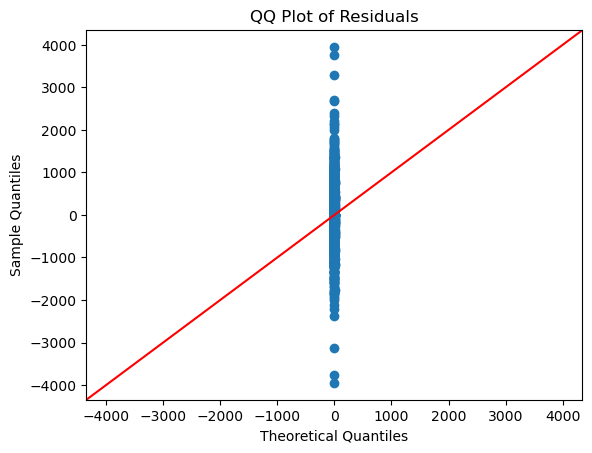

In [292]:
# Compute residuals
residuals = np.array(train_labels) - housing_predictions
import statsmodels.api as sm

# Plot QQ plot
sm.qqplot(residuals, line = '45')
plt.title('QQ Plot of Residuals')
plt.show()

Decision Tree Regressor Model

In [271]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_prepared, train_labels)

DecisionTreeRegressor()

In [281]:
housing_predictions = tree_reg.predict(train_prepared)
tree_mse = mean_squared_error(train_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


0.0

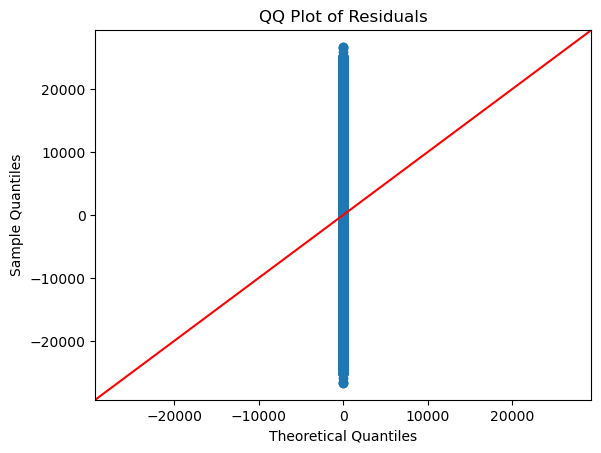

In [283]:
# Compute residuals
residuals = np.array(train_labels) - housing_predictions
import statsmodels.api as sm

# Plot QQ plot
sm.qqplot(residuals, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

Forest Regressor Model

In [274]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train_prepared, train_labels)


c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [275]:
housing_predictions = forest_reg.predict(train_prepared)
forest_mse = mean_squared_error(train_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

418.6735636573822


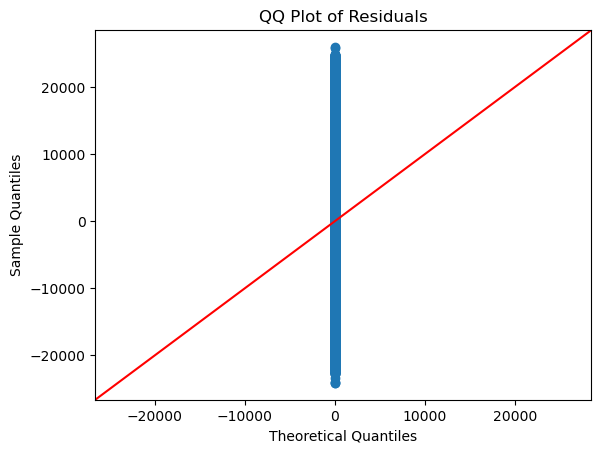

In [276]:
# Compute residuals
residuals = np.array(train_labels) - housing_predictions
import statsmodels.api as sm

# Plot QQ plot
sm.qqplot(residuals, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

Potentially Saving the model for future usage

In [147]:
import joblib

In [148]:
# # Save the trained model to a file
# joblib.dump(forest_reg, "forest_reg.pkl")

# # Later, when you want to use the model again
# # Load the model from the file
# forest_reg = joblib.load("forest_reg.pkl")

Could this model really be absolutely perfect? Of course,
it is much more likely that the model has badly overfit the data. How can you be sure?
As we saw earlier, you don’t want to touch the test set until you are ready to launch a
model you are confident about, so you need to use part of the training set for train‐
ing, and part for model validation

## 10.2 Better Evaluation Using Cross-Validation

In [149]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, train_prepared, train_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [150]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [1312.51497304 1795.64021513 1930.81640507 1515.85882268 1309.52915354
 1551.51200447 1371.3640144  1654.51020245 1216.56381255 1875.67688049]
Mean: 1553.3986483806898
Standard deviation: 240.98056624561264


In [151]:
lin_scores = cross_val_score(lin_reg, train_prepared, train_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores: [ 1608.33548659  1748.06402417 51244.77896235  1534.79937471
  1214.14398044  1434.07390401  1604.72609667  1631.67109235
  2516.92827664  1566.53280311]
Mean: 6610.405400104848
Standard deviation: 14881.55911957139


In [152]:
forest_scores = cross_val_score(forest_reg, train_prepared, train_labels,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)


c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

Scores: [1063.36396383 1594.9789086  1533.76323347 1135.49157959  911.17861361
 1065.2989524   997.50263236 1099.25748672  857.55349722 1366.07947932]
Mean: 1162.4468347112343
Standard deviation: 239.520975860781


The score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set. The solution include:
* Simplify the model
* Constrain it (i.e., regularize it)
* Get a lot more training data

Try others ML models, the goal is to shortlist 2-5 promising models

# 11. Fine Tune Your Model

## 11.1 Grid Search
One way to do that would be to fiddle with the hyperparameters manually, until you find a great combination of hyperparameter values. This would be very tedious work, and you may not have time to explore many combinations.


Instead you should get Scikit-Learn’s GridSearchCV to search for you. All you need to do is tell it which hyperparameters you want it to experiment with, and what values to try out, and it will evaluate all the possible combinations of hyperparameter values, using cross-validation.

In [153]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [5, 25, 50], 'max_features': [5, 10, 15, 25]},
 {'bootstrap': [False], 'n_estimators': [5, 10], 'max_features': [5, 10, 15]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(train_prepared, train_labels)


c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [5, 10, 15, 25],
                          'n_estimators': [5, 25, 50]},
                         {'bootstrap': [False], 'max_features': [5, 10, 15],
                          'n_estimators': [5, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [154]:
GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(train_prepared, train_labels)


c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [5, 10, 15, 25],
                          'n_estimators': [5, 25, 50]},
                         {'bootstrap': [False], 'max_features': [5, 10, 15],
                          'n_estimators': [5, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

This param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of n_estimators and max_features hyperparameter values specified in the first dict. It will then try all 2 × 3 = 6 combinations of hyperparameter values in the second dict, but this time with the bootstrap hyperparameter set to False instead of True (which is the default value for this hyperparameter)

In [155]:
grid_search.best_params_


{'max_features': 25, 'n_estimators': 50}

In [156]:
grid_search.best_estimator_

RandomForestRegressor(max_features=25, n_estimators=50)

In [157]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


1741.9010205785337 {'max_features': 5, 'n_estimators': 5}
1551.8611930018337 {'max_features': 5, 'n_estimators': 25}
1493.7782442148339 {'max_features': 5, 'n_estimators': 50}
1584.5700081116534 {'max_features': 10, 'n_estimators': 5}
1485.2302076929293 {'max_features': 10, 'n_estimators': 25}
1413.487092255838 {'max_features': 10, 'n_estimators': 50}
1530.3492611084323 {'max_features': 15, 'n_estimators': 5}
1384.1581265121597 {'max_features': 15, 'n_estimators': 25}
1349.658350357951 {'max_features': 15, 'n_estimators': 50}
1516.904791116909 {'max_features': 25, 'n_estimators': 5}
1308.348467770575 {'max_features': 25, 'n_estimators': 25}
1290.9872281709356 {'max_features': 25, 'n_estimators': 50}
1637.329992564966 {'bootstrap': False, 'max_features': 5, 'n_estimators': 5}
1523.8611913026098 {'bootstrap': False, 'max_features': 5, 'n_estimators': 10}
1641.8419396840466 {'bootstrap': False, 'max_features': 10, 'n_estimators': 5}
1529.608642897869 {'bootstrap': False, 'max_features': 1

Non of the fine tune model are as good as the orininal one

## 11.2 Randomized Search
Better when the hyperparameter space is large. This approach is the same way as the GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. This approach has two main benefits:
* If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).
* You have more control over the computing budget you want to allocate to hyperparameter search, simply by setting the number of iterations


## 11.3 Ensemble Methods
Another way to fine-tune your system is to try to combine the models that perform best. The group (or “ensemble”) will often perform better than the best individual model (just like Random Forests perform better than the individual Decision Trees they rely on), especially if the individual models make very different types of errors.

# 12. Analyze Model and Explain Features important

In [158]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.77799626e-01, 1.02324938e-02, 1.79121192e-01, 8.59245806e-02,
       2.81404125e-02, 1.03944066e-02, 7.92465453e-04, 2.23076409e-02,
       5.70322341e-02, 9.37353732e-03, 2.09425520e-02, 3.15666358e-03,
       1.06427406e-03, 0.00000000e+00, 5.25713255e-03, 1.31823293e-03,
       1.18021383e-02, 7.60030745e-04, 7.60357907e-03, 2.02928866e-02,
       4.46844111e-02, 5.82304059e-02, 5.78167190e-02, 1.40418256e-02,
       1.30988968e-02, 5.23578731e-04, 1.95668943e-03, 5.32968356e-03,
       1.09843384e-02, 2.94450942e-03, 5.17488859e-03, 2.17457948e-03,
       3.67360976e-06, 4.39536758e-03, 2.21869143e-05, 1.07303710e-04,
       1.54463232e-04, 2.93278930e-06, 4.11965118e-05, 6.01523534e-05,
       1.83285552e-04, 4.43245494e-05, 1.31257189e-03, 6.47400490e-05,
       9.56865646e-05, 3.69183575e-06, 3.39385980e-04, 5.72742310e-05,
       3.92890938e-04, 5.11676850e-05, 5.00426318e-06, 1.23986219e-05,
       2.02546953e-04, 4.36265986e-05, 1.06637589e-04, 5.02121932e-05,
      

# 13 Evaluate Your System on the Test Set
Now is the time to evaluate the final model on the test set. There is nothing special about this process; just get the predictors and the labels from your test set, run your full_pipeline to transform the data (call `transform`, not `fit_transform()`, you do not want to fit the test set!), and evaluate the final model on the test set:


In [159]:
final_model = forest_reg

In [162]:
test_set

,id,model,price,age_08_04,mfg_month,mfg_year,km,fuel_type,hp,met_color,color,automatic,cc,doors,cylinders,gears,quarterly_tax,weight,mfr_guarantee,bovag_guarantee,guarantee_period,abs,airbag_1,airbag_2,airco,automatic_airco,boardcomputer,cd_player,central_lock,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,parking_assistant,tow_bar,version,km_per_year
594,598,Corolla 1.4 16V VVT I HATCHB TERRA 2/3-Doors,10800.0,50.0,7,2000,22500.0,Petrol,97,1,Green,0,1400,2/3-Doors,4,5,69,1025,0,1,3,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1.4,450.000000
754,758,Corolla 1.6 16V HATCHB LINEA LUNA 2/3-Doors,9950.0,68.0,1,1999,80426.0,Petrol,110,1,Green,0,1600,2/3-Doors,4,5,85,1055,1,1,3,1,1,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1.6,1182.735294
630,634,Corolla 2.0D XL Sedan 4/5-Doors,7500.0,59.0,10,1999,130000.0,Diesel,72,1,Grey,0,2000,4/5-Doors,4,5,185,1135,0,1,3,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,NaN,2203.389831
1259,1266,Corolla 1.6 16V LIFTB LINEA TERRA 4/5-Doors,9250.0,71.0,10,1998,76000.0,Petrol,110,1,Blue,0,1600,4/5-Doors,4,5,85,1070,0,1,3,1,1,1,1,0,0,0,1,1,1,0,0,0,1,0,0,0,1,1.6,1070.422535
903,907,Corolla 1.6 VVTi Linea Luna Lift 4/5-Doors,9750.0,65.0,4,1999,59000.0,Petrol,110,0,Green,0,1600,4/5-Doors,4,5,19,1075,0,0,12,1,1,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1.6,907.692308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,564,Corolla 1.6 16V VVT I HATCHB TERRA 2/3-Doors,10950.0,54.0,3,2000,39291.0,Petrol,110,1,Green,0,1600,2/3-Doors,4,5,69,1040,0,1,3,0,1,1,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1.6,727.611111
156,158,Corolla 1.6 16V VVT I SEDAN SOL 4/5-Doors,19500.0,16.0,5,2003,13000.0,Petrol,110,1,Grey,0,1600,4/5-Doors,4,5,85,1105,1,1,3,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1.6,812.500000
618,622,Corolla 1.6 16V G6 2/3-Doors,8450.0,64.0,5,1999,144000.0,CNG,110,1,Black,0,1600,2/3-Doors,4,6,72,1065,0,1,3,0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1.6,2250.000000
934,938,Corolla 1.3 Hatchback 2/3-Doors,8950.0,65.0,4,1999,55000.0,Petrol,86,1,Silver,0,1300,2/3-Doors,4,5,69,1015,0,0,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,846.153846


In [163]:
test = test_set.drop("price", axis=1)
test_labels = test_set["price"].copy()

test_prepared = full_pipeline.transform(test)
test_labels = train_labels_imputer.transform(test_labels.values.reshape(-1, 1))

final_model.fit(test_prepared, test_labels)
final_predictions = final_model .predict(test_prepared)
final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [164]:
print(final_rmse)

472.5303641525819
